In [ ]:
#importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

#to check the version of the tensorflow
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


In [ ]:
#initializing the Neural Network
#later on this class will be instantiated by passing the layers, where all the layers will be Fully Connected
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        #we will also keep track of weights and biases as well as gradients
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        #initializing the values of parameters of the layers, starting with second layer, since first one is the input layer
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i],1)))

In [ ]:
#implementation of the forward pass
class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):
        #X is the input X or the batch of the input
        A = tf.convert_to_tensor(X, dtype = tf.float32)
        #converting the input into tensors
        for i in range(1, self.L):
            z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu(z)
                #except final layer all other layers are actiavted using the relu activation
            else:
                A = z
                #final layer have no activation
        return A

In [ ]:
#functions for computing loss and updating the parameters
class NeuralNetwork(NeuralNetwork):
    #for computing the loss using the softmax function
    def compute_loss(self, A, Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y, A)
        return tf.reduce_mean(loss)
    
    #for updating the paramters values of layer
    def update_params(self, lr):
        for i in range(1, self.L):
            self.W[i].assign_sub(lr * self.dW[i])
            self.b[i].assign_sub(lr * self.db[i])

In [ ]:
#function for prediction
class NeuralNetwork(NeuralNetwork):
    def predict(self, X):
        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A), axis = 1)
    
    #to show the summary of the neural network
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):
            print('Layer {}, Units {}'.format(i, self.layers[i]))
        print('--------------')
        print('Number of parameters:', num_params)

In [ ]:
#training algorithm for the batch
class NeuralNetwork(NeuralNetwork):
    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X, dtype = tf.float32)
        Y = tf.convert_to_tensor(Y, dtype = tf.float32)
        #converting the input into tensors
        
        with tf.GradientTape(persistent = True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A, Y)
        for i in range(1, self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
            
        del tape
        self.update_params(lr)
        return loss.numpy()

In [ ]:
#training on the complete set
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):
        history = {
            'val_loss': [],
            'train_loss': [],
            'val_acc': []
        }
        
        for e in range(0, epochs):
            epoch_train_loss = 0.
            print('Epoch {}'.format(e), end = '.')
            for i in range(0, steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss+= batch_loss
                
                if i%int(steps_per_epoch/10) == 0:
                    print(end = '.')
                    
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A, y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            val_acc = np.mean(np.argmax(y_test, axis = 1) == val_preds.numpy())
            history['val_acc'].append(val_acc)
            print('Val acc: ',val_acc)
        return history

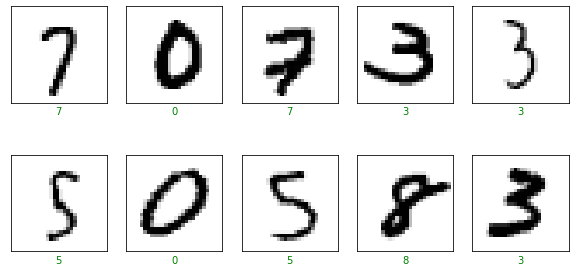

In [ ]:
#using the helper function
(x_train, y_train), (x_test, y_test) = nn_utils.load_data()
#helper function will provide the preprocess data only
#plotting some of the examples
nn_utils.plot_random_examples(x_train, y_train).show()

In [ ]:
#creating the neural network
net = NeuralNetwork([784, 128, 128 ,10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [ ]:
#setting up the training parameters
batch_size = 120
epochs = 5
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch', steps_per_epoch)

Steps per epoch 500


In [ ]:
#training the neural network
history = net.train(
    x_train, y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr
)

Epoch 0...........Val acc:  0.8074
Epoch 1...........Val acc:  0.841
Epoch 2...........Val acc:  0.8564
Epoch 3...........Val acc:  0.8648
Epoch 4...........Val acc:  0.8686


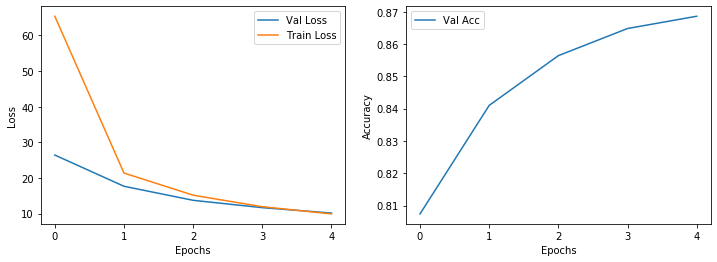

In [ ]:
nn_utils.plot_results(history).show()
#using helper function for the plotting of history objects

In [ ]:
preds = net.predict(x_test)
#to get some of the prediction

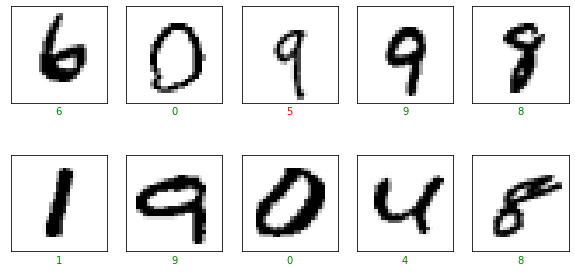

In [ ]:
nn_utils.plot_random_examples(x_test, y_test, preds.numpy()).show()
#to plot some of the predictions